<a href="https://colab.research.google.com/github/Wapiti08/InfPrd/blob/main/link_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install stellargraph==1.2.1
!pip3 install networkx==2.5

     |████████████████████████████████| 435 kB 11.6 MB/s 
     |████████████████████████████████| 462 kB 34.3 MB/s 
     |████████████████████████████████| 1.6 MB 12.9 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# split the data and create training and test reduced subgraphs
from stellargraph.data import EdgeSplitter
from stellargraph import StellarGraph
import networkx as nx
from sklearn.model_selection import train_test_split

In [43]:
# G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)
G = nx.read_edgelist("107.edges", create_using=nx.Graph(), nodetype=int)
# create splitter instance for subgraphs
edgeSplitter = EdgeSplitter(G)
# split data for test
graph_test, samples_test, labels_test = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)
print(graph_test.number_of_edges())
print(graph_test.number_of_nodes())
# g and g_master
edgeSplitter = EdgeSplitter(graph_test, G)
# split data for train
graph_train, samples_train, labels_train = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)
print(graph_train.number_of_edges())
print(graph_train.number_of_nodes())

** Sampled 2674 positive and 2674 negative edges. **
24075
1034
** Sampled 2407 positive and 2407 negative edges. **
21668
1034


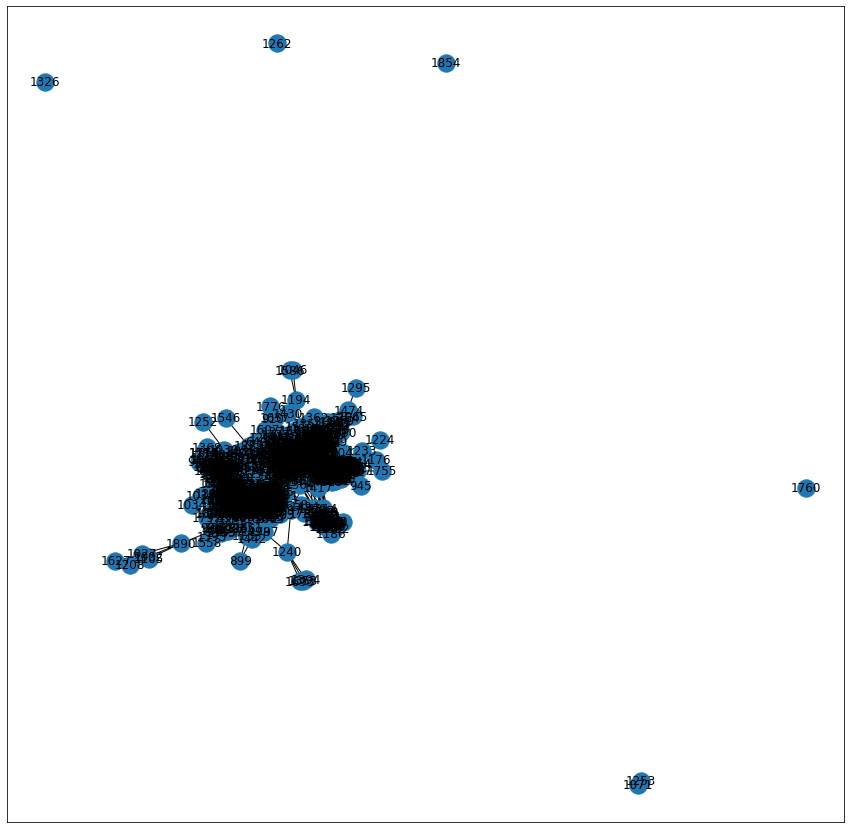

In [35]:
# explore the subgraphs a bit
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
nx.draw_networkx(graph_train)
plt.show()

### Node2Vec without supervision

In [7]:
# avoid the error about:
'''
    __init__() got an unexpected keyword argument 'size' in node2vec
'''
!pip3 install node2vec==0.3.3
!pip3 install -I --user gensim==4.0.1

  Created wheel for node2vec: filename=node2vec-0.3.3-py3-none-any.whl size=5673 sha256=39c53b4ef7c1b2355f6db137ff94c9da20421c057c7efcaff6461da4e160f201
  Stored in directory: /root/.cache/pip/wheels/da/ba/7d/e3e173c4133d8b8c498981bdd8b115e4bd5dcf6c314e513fa6
Successfully built node2vec
     |████████████████████████████████| 23.9 MB 2.0 MB/s 
     |████████████████████████████████| 15.7 MB 7.4 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatibl

In [14]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

# generate node embedding for graph
node_vec = Node2Vec(G)
node_model = node_vec.fit()
# generating an embedding for each pair of embedded nodes
edges_embs = HadamardEmbedder(keyed_vectors=node_model.wv)
# traverse to get all the node embeddings
train_embs = [edges_embs[str(x[0]), str(x[1])] for x in samples_train]
test_embs = [edges_embs[str(x[0]), str(x[1])] for x in samples_test]


# import the class
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_embs, labels_train)

# predict
y_pred = rf.predict(test_embs)
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred))


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:53<00:00,  5.39s/it]


Precision: 0.9235116804822909
Recall: 0.9166043380703066
F1-Score: 0.920045045045045


## Result Records:

Node2Vec for graph_train:
  - Precision: 0.9033816425120773
  - Recall: 0.9091249065071054
  - F1-Score: 0.9062441752096925

Node2Vec for G:
  - Precision: 0.9235116804822909
  - Recall: 0.9166043380703066
  - F1-Score: 0.920045045045045

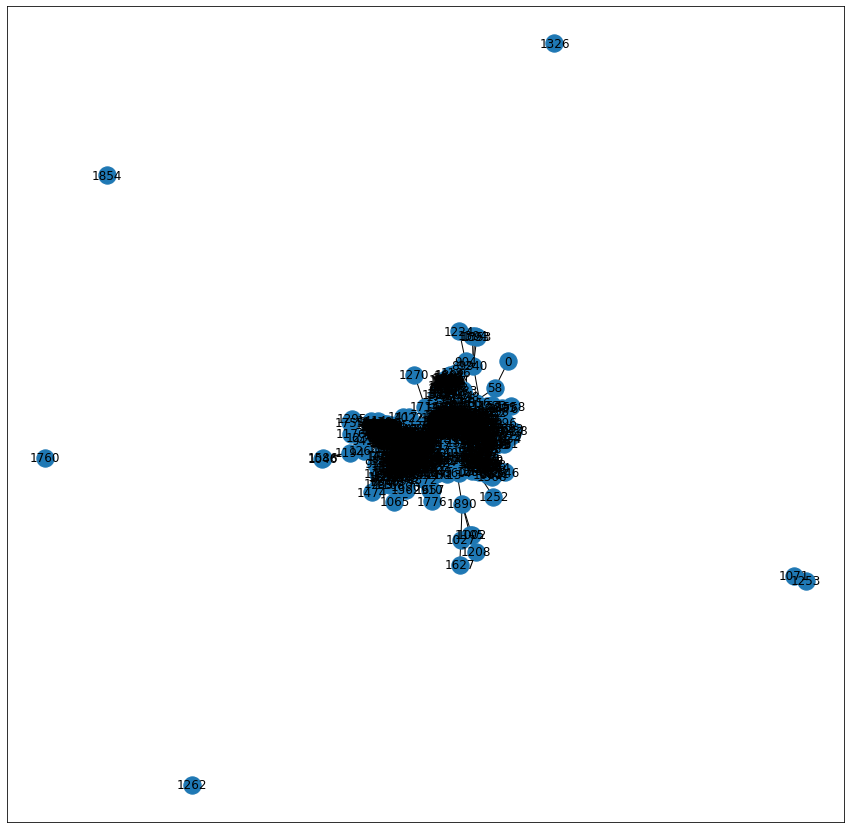

In [15]:
# explore the subgraphs a bit
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
nx.draw_networkx(graph_train)
plt.show()

In [33]:
print(G.number_of_nodes())
print(graph_train.number_of_nodes())
print(graph_test.number_of_nodes())

1034
1034
1034


In [30]:
G.nodes()

NodeView((953, 1323, 1789, 1707, 1175, 1059, 1329, 1559, 1804, 1898, 1622, 1520, 1200, 1202, 1449, 1836, 1156, 1605, 1149, 1173, 1180, 1549, 1412, 1638, 942, 1448, 1786, 1768, 1092, 927, 1791, 1287, 1516, 1044, 1235, 1100, 1279, 1366, 1472, 1374, 483, 1610, 1021, 1322, 923, 1505, 1761, 1566, 1211, 1835, 896, 1479, 1215, 1199, 1539, 1153, 1796, 1355, 1236, 1899, 1884, 1425, 475, 1298, 366, 930, 1230, 1621, 1437, 1337, 1801, 1695, 1795, 1839, 1632, 1370, 1340, 1871, 954, 1718, 1846, 1582, 1438, 1060, 1859, 1816, 1619, 1431, 1734, 944, 1428, 1097, 958, 1488, 1471, 1613, 1250, 1833, 1085, 1518, 1163, 1040, 1900, 1819, 1557, 1864, 1754, 1813, 1135, 908, 1537, 1612, 1652, 1389, 1740, 1122, 1352, 1483, 959, 1569, 1903, 641, 1625, 1444, 1876, 1192, 1129, 1078, 1420, 1360, 1579, 1794, 1334, 1716, 1765, 1703, 1686, 924, 1260, 1285, 916, 1714, 952, 1332, 1210, 1459, 1680, 1222, 1124, 1399, 1377, 975, 1256, 926, 1345, 1126, 1596, 1432, 1414, 1752, 1344, 1402, 1101, 1837, 1424, 1730, 1074, 980, 134